#**Capstone Overview**

**Goals:** Goals dari analisa saya adalah membuat ML Tools untuk memberikan prediksi atas nasabah mana yang memiliki potensi tinggi akan membuka deposito. 

**Benefit:** Dengan demikian team marketing akan lebih baik dan akurat dalam mem-prioritaskan nasabah mana yang perlu ditawari deposito serta untuk mengetahui faktor-faktor mana saja yang berpotensi meningkatkan possibility nasabah tersebut akan semakin bersedia membuka deposito. 

Benefit adalah berupa peningkatan efisiensi aktivitas marketing maupun biaya marketing dalam menjaring pipeline nasabah yang berkualitas/berpotensi tinggi bersedia membuka deposito. 

**User:** Marketing Executive (Executive Decision Taker) dalam pengambilan keputusan strategi marketing beserta marketing team untuk produk Deposito   

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [220]:
# 1. Memasukan data ke Python

In [222]:
df = pd.read_csv('data_bank_marketing_campaign.csv')

In [224]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,49,management,-6847,no,yes,cellular,jul,1,-1,unknown,no
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,management,-2282,yes,yes,cellular,jul,6,-1,unknown,no
3,49,entrepreneur,-1965,no,yes,telephone,jul,2,-1,unknown,no
4,51,technician,-1944,yes,no,cellular,may,1,-1,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
7808,39,technician,45248,yes,no,unknown,may,1,-1,unknown,yes
7809,56,entrepreneur,51439,no,yes,cellular,jul,1,-1,unknown,no
7810,61,self-employed,52587,no,no,cellular,aug,1,-1,unknown,yes
7811,61,self-employed,52587,no,no,cellular,feb,3,189,success,yes


In [226]:
# cek basic statistics unt numerical columns
print(df.describe())
# Information about data types and non-null counts
print(df.info())

               age       balance     campaign        pdays
count  7813.000000   7813.000000  7813.000000  7813.000000
mean     41.257264   1512.448611     2.519775    51.408550
std      11.919710   3089.291831     2.727001   108.072739
min      18.000000  -6847.000000     1.000000    -1.000000
25%      32.000000    127.000000     1.000000    -1.000000
50%      39.000000    549.000000     2.000000    -1.000000
75%      49.000000   1684.000000     3.000000    40.000000
max      95.000000  66653.000000    63.000000   854.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 

#Keterangan
a. contact: Contact communication type.
b. month: Last contact month of the year.
c. campaign: Number of contacts performed during this campaign and for this client.
d. pdays: Number of days after the client was contacted from the previous campaign.
e. poutcome: Outcome of the previous marketing campaign.
f. deposit: Whether the customer deposits or not.

2. Review atas hasil "basic statistik" dan identifikasi data null 

In [230]:
# cek basic statistics unt numerical columns
print(df.describe())
# Information about data types and non-null counts
print(df.info())

               age       balance     campaign        pdays
count  7813.000000   7813.000000  7813.000000  7813.000000
mean     41.257264   1512.448611     2.519775    51.408550
std      11.919710   3089.291831     2.727001   108.072739
min      18.000000  -6847.000000     1.000000    -1.000000
25%      32.000000    127.000000     1.000000    -1.000000
50%      39.000000    549.000000     2.000000    -1.000000
75%      49.000000   1684.000000     3.000000    40.000000
max      95.000000  66653.000000    63.000000   854.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 

Hasil review tahapan 2 tidak terdapat data null namun untuk data kategorik type data masih object serta data numerik ada di int64.

3. A. Identifikasi variasi dari data awal dengan tipe kategorikal : jenis/variasi isian data untuk data kategorikal

In [234]:
# mendapatkan value counts untuk seluruh kolom "categorical"
categorical_cols = df.select_dtypes(include=['object'])
for col in categorical_cols.columns:
    print(f"Value counts for {col}:\n")
    print(df[col].value_counts())
    print("\n")

Value counts for job:

job
management       1792
blue-collar      1346
technician       1291
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: count, dtype: int64


Value counts for housing:

housing
no     4140
yes    3673
Name: count, dtype: int64


Value counts for loan:

loan
no     6789
yes    1024
Name: count, dtype: int64


Value counts for contact:

contact
cellular     5628
unknown      1639
telephone     546
Name: count, dtype: int64


Value counts for month:

month
may    1976
aug    1085
jul    1050
jun     857
apr     662
nov     657
feb     534
oct     286
jan     227
sep     212
mar     199
dec      68
Name: count, dtype: int64


Value counts for poutcome:

poutcome
unknown    5819
failure     848
success     761
other       385
Name: count, dtype: int64


Value counts for deposit:

deposit
no     4081
yes    3732
Name:

3. B. Merubah data kategorik dengan type Object menjadi type yang lebih sesuai

In [237]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,49,management,-6847,no,yes,cellular,jul,1,-1,unknown,no
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,management,-2282,yes,yes,cellular,jul,6,-1,unknown,no
3,49,entrepreneur,-1965,no,yes,telephone,jul,2,-1,unknown,no
4,51,technician,-1944,yes,no,cellular,may,1,-1,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
7808,39,technician,45248,yes,no,unknown,may,1,-1,unknown,yes
7809,56,entrepreneur,51439,no,yes,cellular,jul,1,-1,unknown,no
7810,61,self-employed,52587,no,no,cellular,aug,1,-1,unknown,yes
7811,61,self-employed,52587,no,no,cellular,feb,3,189,success,yes


In [239]:
#Boolean data, merubah data Housing, Loan dan Deposit menjadi o dan 1 
boolean_mapping = {'yes':1, 'no':0}

df['housing'] = df['housing'].map(boolean_mapping)
df['loan'] = df['loan'].map(boolean_mapping)
df['deposit'] = df['deposit'].map(boolean_mapping)
      

In [241]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,49,management,-6847,0,1,cellular,jul,1,-1,unknown,0
1,39,self-employed,-3058,1,1,cellular,apr,3,-1,unknown,1
2,51,management,-2282,1,1,cellular,jul,6,-1,unknown,0
3,49,entrepreneur,-1965,0,1,telephone,jul,2,-1,unknown,0
4,51,technician,-1944,1,0,cellular,may,1,-1,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
7808,39,technician,45248,1,0,unknown,may,1,-1,unknown,1
7809,56,entrepreneur,51439,0,1,cellular,jul,1,-1,unknown,0
7810,61,self-employed,52587,0,0,cellular,aug,1,-1,unknown,1
7811,61,self-employed,52587,0,0,cellular,feb,3,189,success,1


In [243]:
#category data, merubah data kategorik object menjadi category
cat_to_convert = ['job', 'contact', 'month', 'poutcome']
df[cat_to_convert] = df[cat_to_convert].astype('category')
print(df.dtypes)

age            int64
job         category
balance        int64
housing        int64
loan           int64
contact     category
month       category
campaign       int64
pdays          int64
poutcome    category
deposit        int64
dtype: object


In [245]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,49,management,-6847,0,1,cellular,jul,1,-1,unknown,0
1,39,self-employed,-3058,1,1,cellular,apr,3,-1,unknown,1
2,51,management,-2282,1,1,cellular,jul,6,-1,unknown,0
3,49,entrepreneur,-1965,0,1,telephone,jul,2,-1,unknown,0
4,51,technician,-1944,1,0,cellular,may,1,-1,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
7808,39,technician,45248,1,0,unknown,may,1,-1,unknown,1
7809,56,entrepreneur,51439,0,1,cellular,jul,1,-1,unknown,0
7810,61,self-employed,52587,0,0,cellular,aug,1,-1,unknown,1
7811,61,self-employed,52587,0,0,cellular,feb,3,189,success,1


3. C. Merubah data dengan status "unknown" menjadi "other". 

Dalam hal ini dilakukan perubahahan tersebut hanya dilakukan  untuk variabel "Job" dan "Contact". 

Job karena jml nya sangat kecil jadi tidak apa2 saya masukan saja sebagai data untuk dianalisa dengan menjadikan pekerjaan nya sebagai other. 

Untuk Contact adalah variabel cara menghubungi nasabah. Jumlah unknown nya cukup banyak sehingga jika kita hilangkan maka nanti akan ada banyak data yg hilang. Dalam hal ini tetap saya ikutsertakan dengan melabeli unknown menjadi other.

Sedangkan untuk outcome saya biarkan unknown karena data unknown-nya terlalu banyak... variable ini tidak akan dijadikan bahan untuk analisa lebih lanjut 

In [248]:
df[['job','contact']] = df[['job','contact']].replace('unknown', 'other')

In [250]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,49,management,-6847,0,1,cellular,jul,1,-1,unknown,0
1,39,self-employed,-3058,1,1,cellular,apr,3,-1,unknown,1
2,51,management,-2282,1,1,cellular,jul,6,-1,unknown,0
3,49,entrepreneur,-1965,0,1,telephone,jul,2,-1,unknown,0
4,51,technician,-1944,1,0,cellular,may,1,-1,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
7808,39,technician,45248,1,0,other,may,1,-1,unknown,1
7809,56,entrepreneur,51439,0,1,cellular,jul,1,-1,unknown,0
7810,61,self-employed,52587,0,0,cellular,aug,1,-1,unknown,1
7811,61,self-employed,52587,0,0,cellular,feb,3,189,success,1


3. D. Treatement atas data dengan value negatif

Di dalam data ini ada dua variable yang bernilai negatif yaitu 1. Balance atau saldo tabungan nasabah dan 2. Pdays atau jml hari terhitung sejak nasabah terakhir kali dihubungi Bank untuk  campaign promosi.  

Berdasarkan domain knowledge yang saya miliki, balance negatif biasanya nasabah tidak memiliki dana pada rekening dan habis terkikis oleh biaya bulanan. Menurut hemat saya saldo negatif sebaiknya dianggap 0 saja karena nilai negatifnya tidak relevan. Berdasarkan database saat ini juga ada nasabah dengan saldo tabungan negatif atau nihil tetapi memiliki deposito. Jadi saldo negatif sebaiknya kita rubah atau disamakan dengan saldo 0 agar nilai negaitfnya tidak memberikan ukuran yang kurang sesuai pada analisa data.  

Sedangkan -1 pada pdays memiliki potensi bahwa nasabah baru saja dihubungi oleh Bank. Dalam hal ini saya lebih prefer menjadikan ukuran 0 karena lebih intuitif secara bisnis (tidak ada selisih hari yang nilainya negatif).

Kedua variabel tersebut apabila ada nilai negatif saya treat sebagai data dengan nilai 0.

In [253]:
variable_to_modify = ['balance', 'pdays']
df2 = df.copy()
df2[variable_to_modify] = np.where(df2[variable_to_modify] < 0, 0, df2[variable_to_modify])
print("\nDataFrame after replacing negative values with 0 using numpy.where:")
print(df2)


DataFrame after replacing negative values with 0 using numpy.where:
      age            job  balance  housing  loan    contact month  campaign  \
0      49     management        0        0     1   cellular   jul         1   
1      39  self-employed        0        1     1   cellular   apr         3   
2      51     management        0        1     1   cellular   jul         6   
3      49   entrepreneur        0        0     1  telephone   jul         2   
4      51     technician        0        1     0   cellular   may         1   
...   ...            ...      ...      ...   ...        ...   ...       ...   
7808   39     technician    45248        1     0      other   may         1   
7809   56   entrepreneur    51439        0     1   cellular   jul         1   
7810   61  self-employed    52587        0     0   cellular   aug         1   
7811   61  self-employed    52587        0     0   cellular   feb         3   
7812   52    blue-collar    66653        0     0   cellular   

In [255]:
df2

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,49,management,0,0,1,cellular,jul,1,0,unknown,0
1,39,self-employed,0,1,1,cellular,apr,3,0,unknown,1
2,51,management,0,1,1,cellular,jul,6,0,unknown,0
3,49,entrepreneur,0,0,1,telephone,jul,2,0,unknown,0
4,51,technician,0,1,0,cellular,may,1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
7808,39,technician,45248,1,0,other,may,1,0,unknown,1
7809,56,entrepreneur,51439,0,1,cellular,jul,1,0,unknown,0
7810,61,self-employed,52587,0,0,cellular,aug,1,0,unknown,1
7811,61,self-employed,52587,0,0,cellular,feb,3,189,success,1


3. E Identifikasi nilai pencilan dari data numerik
Dalam hal ini saya akan menggunakan metode IQR

In [258]:
numeric_columns = df2.select_dtypes(include=[np.number]).columns
print("\nNumeric columns:", numeric_columns)


Numeric columns: Index(['age', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'deposit'], dtype='object')


In [260]:
Q1 = df2[numeric_columns].quantile(0.25)
Q3 = df2[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = (df2[numeric_columns] < lower_bound) | (df2[numeric_columns] > upper_bound)
print("\nOutliers identified using IQR:")
print(outliers_iqr)


Outliers identified using IQR:
        age  balance  housing   loan  campaign  pdays  deposit
0     False    False    False   True     False  False    False
1     False    False    False   True     False  False    False
2     False    False    False   True     False  False    False
3     False    False    False   True     False  False    False
4     False    False    False  False     False  False    False
...     ...      ...      ...    ...       ...    ...      ...
7808  False     True    False  False     False  False    False
7809  False     True    False   True     False  False    False
7810  False     True    False  False     False  False    False
7811  False     True    False  False     False   True    False
7812  False     True    False  False     False  False    False

[7813 rows x 7 columns]


In [262]:
rows_with_outliers_iqr = outliers_iqr.any(axis=1).sum()

print("\nNumber of rows with at least one outlier identified using IQR:", rows_with_outliers_iqr)


Number of rows with at least one outlier identified using IQR: 3229


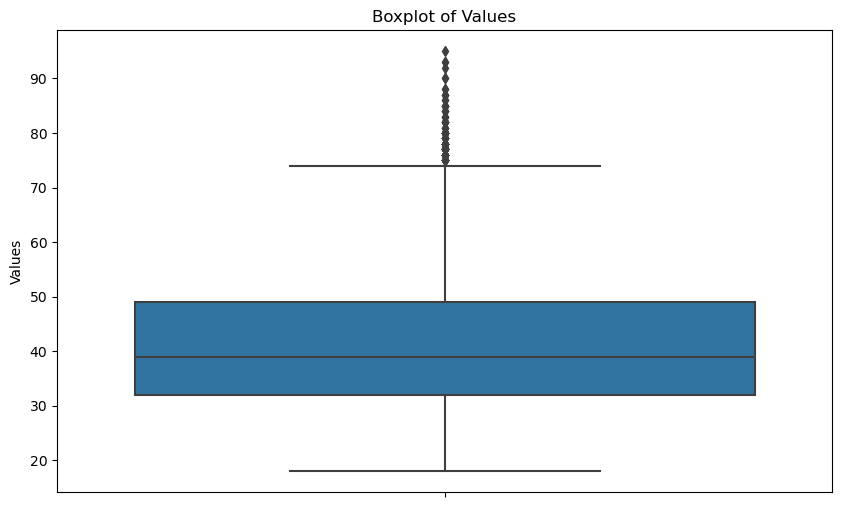

In [264]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df2['age'])
plt.title('Boxplot of Values')
plt.ylabel('Values')
plt.show()

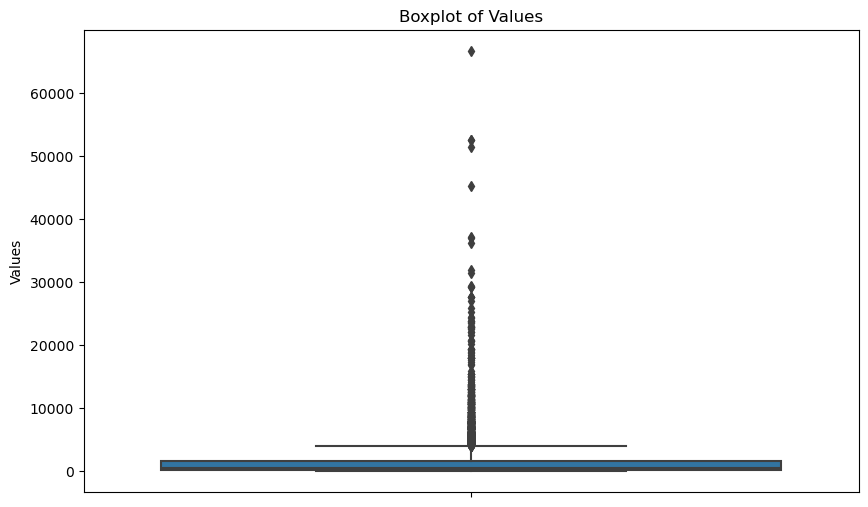

In [266]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df2['balance'])
plt.title('Boxplot of Values')
plt.ylabel('Values')
plt.show()

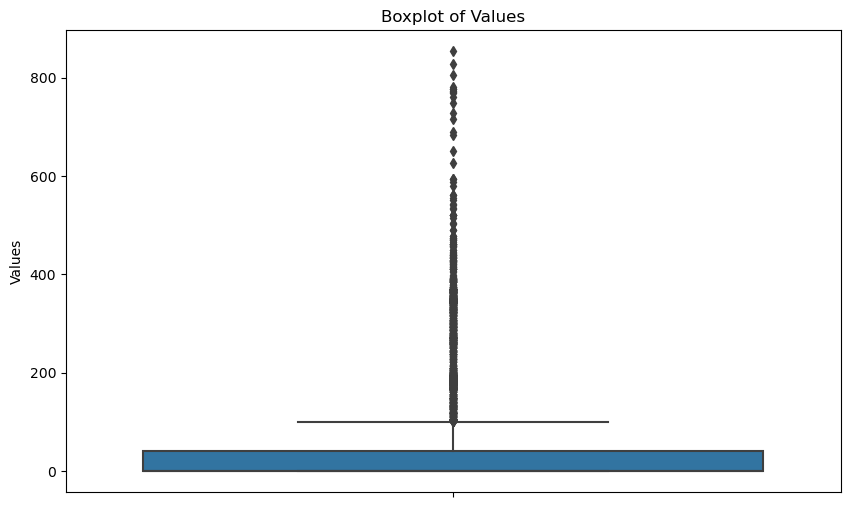

In [267]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df2['pdays'])
plt.title('Boxplot of Values')
plt.ylabel('Values')
plt.show()

Atas beberapa nilai ekstrim atau outlier tersebut akan tetap saya masukkan karena model nya nanti adalah untuk rekomendasi pembukaan deposito (lebih tidak berisiko bagi bank tidak seperti model untuk filter calon debitur seperti credit scoring). Tetap dimasukan agar nanti potensi nasabah yang bisa "terbaca" oleh tools lebih luas.   

4. A Encoding Data
   Berikut nya dilakukan encoding agar data bisa sesuai dengan tujuan analisa (menggunakan regresi logistik) 

In [272]:
#  One-hot encoding untuk seluruh variabel nominal (non ordinal) 
df3 = pd.get_dummies(df2, columns=['job', 'contact', 'month', 'poutcome'], drop_first=False, dtype= float)
print("\nDataFrame after one-hot encoding:")
print(df3)


DataFrame after one-hot encoding:
      age  balance  housing  loan  campaign  pdays  deposit  job_admin.  \
0      49        0        0     1         1      0        0         0.0   
1      39        0        1     1         3      0        1         0.0   
2      51        0        1     1         6      0        0         0.0   
3      49        0        0     1         2      0        0         0.0   
4      51        0        1     0         1      0        1         0.0   
...   ...      ...      ...   ...       ...    ...      ...         ...   
7808   39    45248        1     0         1      0        1         0.0   
7809   56    51439        0     1         1      0        0         0.0   
7810   61    52587        0     0         1      0        1         0.0   
7811   61    52587        0     0         3    189        1         0.0   
7812   52    66653        0     0         3      0        0         0.0   

      job_blue-collar  job_entrepreneur  ...  month_jun  month_m

4. B Remove Duplicate row
   Pada tahapan ini ditambahkan filter atas duplicate value 

In [275]:
duplicates = df3.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

duplicate_rows = df3[df3.duplicated()]
print("Duplicate rows:\n", duplicate_rows)

Number of duplicate rows: 16
Duplicate rows:
       age  balance  housing  loan  campaign  pdays  deposit  job_admin.  \
349    37        0        1     0         2      0        0         0.0   
358    40        0        1     0         1      0        0         0.0   
376    42        0        1     0         1      0        0         0.0   
378    40        0        1     0         1      0        0         0.0   
413    38        0        1     0         1      0        0         0.0   
465    50        0        1     0         2      0        0         0.0   
619    40        0        1     0         2      0        0         1.0   
692    40        0        1     0         2      0        0         0.0   
775    42        0        0     0         2      0        0         0.0   
786    60        0        0     0         3      0        1         0.0   
823    41        0        0     0         2      0        0         0.0   
854    44        0        1     0         1      0    

Terdapat 16 rows yang identik. Preferensi saya adalah meng-exclude data duplicate tersebut untuk menimalisir potensi bias selain itu jumlah nya juga sedikit.   

In [278]:
# Remove all duplicate rows
df4 = df3.drop_duplicates()
print("DataFrame without duplicates:\n", df4)

DataFrame without duplicates:
       age  balance  housing  loan  campaign  pdays  deposit  job_admin.  \
0      49        0        0     1         1      0        0         0.0   
1      39        0        1     1         3      0        1         0.0   
2      51        0        1     1         6      0        0         0.0   
3      49        0        0     1         2      0        0         0.0   
4      51        0        1     0         1      0        1         0.0   
...   ...      ...      ...   ...       ...    ...      ...         ...   
7808   39    45248        1     0         1      0        1         0.0   
7809   56    51439        0     1         1      0        0         0.0   
7810   61    52587        0     0         1      0        1         0.0   
7811   61    52587        0     0         3    189        1         0.0   
7812   52    66653        0     0         3      0        0         0.0   

      job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  

In [280]:
df4['deposit'].value_counts()

deposit
0    4067
1    3730
Name: count, dtype: int64

In [282]:

print(df4.describe())
print(df4.info())

               age       balance      housing         loan     campaign  \
count  7797.000000   7797.000000  7797.000000  7797.000000  7797.000000   
mean     41.257920   1536.142747     0.469668     0.131333     2.521611   
std      11.928352   3078.363427     0.499111     0.337785     2.729361   
min      18.000000      0.000000     0.000000     0.000000     1.000000   
25%      32.000000    129.000000     0.000000     0.000000     1.000000   
50%      39.000000    550.000000     0.000000     0.000000     2.000000   
75%      49.000000   1689.000000     1.000000     0.000000     3.000000   
max      95.000000  66653.000000     1.000000     1.000000    63.000000   

             pdays      deposit   job_admin.  job_blue-collar  \
count  7797.000000  7797.000000  7797.000000      7797.000000   
mean     52.260100     0.478389     0.119918         0.171604   
std     107.796452     0.499565     0.324886         0.377060   
min       0.000000     0.000000     0.000000         0.000000   

Variable engineering : Binning untuk data numeric: Agar model menjadi lebih luas dan umum cakupannya akan disiapkan variabel tambahan berupa klasifikasi atas beberapa variabel numeric menjadi group atau dicretization (via binning).   

In [287]:
# bins = [0, 25, 30, 40, 55, float('inf')]
# labels = ['<25', '25-30', '30-40', '40-55', '>55']
# df4['age_group'] = pd.cut(df4['age'])

In [289]:
# pip install optbinning

In [291]:
# from optbinning import OptimalBinning

# data = df4.copy()
# feature = 'balance'
# target = 'deposit'

# optb = OptimalBinning(name=feature, dtype='numerical')
# optb.fit(data[feature].values,data[target].values)
# binning_table = optb.binning_table
# binningtable = binning_table.build()
# binningtable

In [293]:
# binningtable

In [295]:
# df5 = df4.copy()


In [297]:
bins = [0, 25, 30, 40, 55, float('inf')]
labels = ['<25', '25-30', '30-40', '40-55', '>55']
df4['age_group'] = pd.cut(df4['age'], bins=bins, labels=labels, right=False)

C:\Users\fauzi.achmad\AppData\Local\Temp\ipykernel_11144\1217936862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['age_group'] = pd.cut(df4['age'], bins=bins, labels=labels, right=False)


In [299]:
bins = [0, 25, 30, 40, 55, float('inf')]
labels = ['<25', '25-30', '30-40', '40-55', '>55']
df4['age_group'] = pd.cut(df4['age'], bins=bins, labels=labels, right=False)

C:\Users\fauzi.achmad\AppData\Local\Temp\ipykernel_11144\1217936862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['age_group'] = pd.cut(df4['age'], bins=bins, labels=labels, right=False)


In [301]:
df4['balance_group'] = pd.cut(df4['balance'], bins=5)

C:\Users\fauzi.achmad\AppData\Local\Temp\ipykernel_11144\4191223973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['balance_group'] = pd.cut(df4['balance'], bins=5)


In [303]:
df4

,age,balance,housing,loan,campaign,pdays,deposit,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group,balance_group
0,49,0,0,1,1,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40-55,"(-66.653, 13330.6]"
1,39,0,1,1,3,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30-40,"(-66.653, 13330.6]"
2,51,0,1,1,6,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40-55,"(-66.653, 13330.6]"
3,49,0,0,1,2,0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40-55,"(-66.653, 13330.6]"
4,51,0,1,0,1,0,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40-55,"(-66.653, 13330.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,39,45248,1,0,1,0,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30-40,"(39991.8, 53322.4]"
7809,56,51439,0,1,1,0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,>55,"(39991.8, 53322.4]"
7810,61,52587,0,0,1,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,>55,"(39991.8, 53322.4]"
7811,61,52587,0,0,3,189,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,>55,"(39991.8, 53322.4]"


In [305]:
bins = [0, 30, 90, 180, 360, float('inf')]
labels = ['<30', '31-90', '91-180', '181-360', '>360']
df4['pdays_group'] = pd.cut(df4['pdays'], bins=bins, labels=labels, right=False)

C:\Users\fauzi.achmad\AppData\Local\Temp\ipykernel_11144\258013166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['pdays_group'] = pd.cut(df4['pdays'], bins=bins, labels=labels, right=False)


In [307]:
df4

,age,balance,housing,loan,campaign,pdays,deposit,job_admin.,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group,balance_group,pdays_group
0,49,0,0,1,1,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40-55,"(-66.653, 13330.6]",<30
1,39,0,1,1,3,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30-40,"(-66.653, 13330.6]",<30
2,51,0,1,1,6,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40-55,"(-66.653, 13330.6]",<30
3,49,0,0,1,2,0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40-55,"(-66.653, 13330.6]",<30
4,51,0,1,0,1,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40-55,"(-66.653, 13330.6]",<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,39,45248,1,0,1,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30-40,"(39991.8, 53322.4]",<30
7809,56,51439,0,1,1,0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,>55,"(39991.8, 53322.4]",<30
7810,61,52587,0,0,1,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,>55,"(39991.8, 53322.4]",<30
7811,61,52587,0,0,3,189,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,>55,"(39991.8, 53322.4]",181-360


variable binning tidak jadi digunakan -> lebih memilih melakukan standarisasi dan scalar atas variable numerik yang ada 

Prepare Library 

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Preparation for Logistic Regression

In [342]:
import statsmodels.api as sm

In [344]:
# Penentuan variable x dan y
X = df4.drop(columns=['deposit', 'age_group', 'balance_group', 'pdays_group']) #variable binning tidak jadi digunakan jadi saya drop dari x
Y = df4['deposit']

In [317]:
X.describe

<bound method NDFrame.describe of       age  balance  housing  loan  campaign  pdays  job_admin.  \
0      49        0        0     1         1      0         0.0   
1      39        0        1     1         3      0         0.0   
2      51        0        1     1         6      0         0.0   
3      49        0        0     1         2      0         0.0   
4      51        0        1     0         1      0         0.0   
...   ...      ...      ...   ...       ...    ...         ...   
7808   39    45248        1     0         1      0         0.0   
7809   56    51439        0     1         1      0         0.0   
7810   61    52587        0     0         1      0         0.0   
7811   61    52587        0     0         3    189         0.0   
7812   52    66653        0     0         3      0         0.0   

      job_blue-collar  job_entrepreneur  job_housemaid  ...  month_mar  \
0                 0.0               0.0            0.0  ...        0.0   
1                 0.0    

In [330]:
# cek basic statistics unt numerical columns
print(df4.describe())
# Information about data types and non-null counts
print(df4.info())

               age       balance      housing         loan     campaign  \
count  7797.000000   7797.000000  7797.000000  7797.000000  7797.000000   
mean     41.257920   1536.142747     0.469668     0.131333     2.521611   
std      11.928352   3078.363427     0.499111     0.337785     2.729361   
min      18.000000      0.000000     0.000000     0.000000     1.000000   
25%      32.000000    129.000000     0.000000     0.000000     1.000000   
50%      39.000000    550.000000     0.000000     0.000000     2.000000   
75%      49.000000   1689.000000     1.000000     0.000000     3.000000   
max      95.000000  66653.000000     1.000000     1.000000    63.000000   

             pdays      deposit   job_admin.  job_blue-collar  \
count  7797.000000  7797.000000  7797.000000      7797.000000   
mean     52.260100     0.478389     0.119918         0.171604   
std     107.796452     0.499565     0.324886         0.377060   
min       0.000000     0.000000     0.000000         0.000000   

## Pemodelan dengan Regresi Logistik 

In [382]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [386]:
X_train

,age,balance,housing,loan,campaign,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
5582,26,1417,1,0,3,0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5891,38,1711,0,0,3,202,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5959,78,1780,1,0,2,185,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
919,47,0,0,0,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1461,31,50,0,0,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,54,1168,0,0,5,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5406,30,1286,0,0,12,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
872,35,0,0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7619,48,8990,0,0,2,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [348]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [352]:
model = sm.Logit(Y_train, sm.add_constant(X_train_scaled))
result = model.fit()

         Current function value: 0.566666
         Iterations: 35


C:\Users\fauzi.achmad\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [354]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                 6237
Model:                          Logit   Df Residuals:                     6203
Method:                           MLE   Df Model:                           33
Date:                Mon, 05 Aug 2024   Pseudo R-squ.:                  0.1817
Time:                        19:26:22   Log-Likelihood:                -3534.3
converged:                      False   LL-Null:                       -4319.3
Covariance Type:            nonrobust   LLR p-value:                1.721e-309
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0068      0.031     -0.218      0.827      -0.068       0.054
x1            -0.0291      0.037     -0.782      0.434      -0.102       0.044
x2             0.1222      0.032      3.854      0.0

LLR p-value : 0.00 -> dibawah 0.05 (tolak H0) -> minimal salah satu variabel berpengaruh secara signifikan terhadap risiko default  
p-value : (dipilih yang dibawa 0.05)
coef: 
balance  4.171e-05
housing   -0.4679
loan      -0.4280
campaign  -0.0807

In [394]:
#Selanjutnya dilakukan running model ke dua, model pertama hanya sebagai feature selection 
Var = ['balance', 'housing', 'loan', 'campaign']
X_train2 = X_train[Var]
X_test2 = X_test[Var]

In [396]:
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

In [408]:
X_test2_scaled

array([[-0.40135363,  1.05863461,  2.58111646, -0.5534995 ],
       [-0.05671331, -0.94461298, -0.38742924, -0.5534995 ],
       [-0.40911289, -0.94461298,  2.58111646, -0.5534995 ],
       ...,
       [-0.28205506,  1.05863461, -0.38742924,  0.16570391],
       [ 0.15989928, -0.94461298, -0.38742924, -0.5534995 ],
       [-0.37904577,  1.05863461,  2.58111646, -0.5534995 ]])

In [398]:
model = sm.Logit(Y_train, sm.add_constant(X_train2_scaled))
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.649787
         Iterations 5


In [400]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                 6237
Model:                          Logit   Df Residuals:                     6232
Method:                           MLE   Df Model:                            4
Date:                Mon, 05 Aug 2024   Pseudo R-squ.:                 0.06172
Time:                        19:46:22   Log-Likelihood:                -4052.7
converged:                       True   LL-Null:                       -4319.3
Covariance Type:            nonrobust   LLR p-value:                4.441e-114
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0901      0.027     -3.385      0.001      -0.142      -0.038
x1             0.1467      0.031      4.794      0.000       0.087       0.207
x2            -0.4260      0.027    -16.026      0.0

In [414]:
X_train2_scaled = sm.add_constant(X_train2_scaled)
X_test2_scaled = sm.add_constant(X_test2_scaled)

In [436]:
Y_pred_train = result.predict(X_train2_scaled)
Y_pred_class_train = [1 if x > 0.5 else 0 for x in Y_pred_train]
Y_pred_test = result.predict(X_test2_scaled)
Y_pred_class_test = [1 if x > 0.5 else 0 for x in Y_pred_test]

In [432]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

Untuk uji konsistensi maka dilakukan perbangingan hasil metrics train vs test 

In [440]:
#TEST

# Accuracy
accuracy_test = accuracy_score(Y_test, Y_pred_class_test)

# Precision
precision_test = precision_score(Y_test, Y_pred_class_test)

# Recall
recall_test = recall_score(Y_test, Y_pred_class_test)

# F1 Score
f1_test = f1_score(Y_test, Y_pred_class_test)

# ROC AUC Score
roc_auc_test = roc_auc_score(Y_test, Y_pred_test)

# Confusion Matrix
conf_matrix_test = confusion_matrix(Y_test, Y_pred_class_test)

# Classification Report
class_report_test = classification_report(Y_test, Y_pred_class_test)

# Print metrics
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC AUC Score:", roc_auc_test)
print("Confusion Matrix:\n", conf_matrix_test)
print("Classification Report:\n", class_report_test)

Accuracy: 0.625
Precision: 0.5968660968660968
Recall: 0.5811373092926491
F1 Score: 0.5888966971187631
ROC AUC Score: 0.6576979727864392
Confusion Matrix:
 [[556 283]
 [302 419]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.66       839
           1       0.60      0.58      0.59       721

    accuracy                           0.62      1560
   macro avg       0.62      0.62      0.62      1560
weighted avg       0.62      0.62      0.62      1560



Hasil perbandingan test vs train cukup konsisten sehingga tidak menunjukkan overfitting atau underfitting dan model secara metrics ada di rata-rata tingkat ketepatan prediksi 60%nan

In [ ]:
Pengecekan Multikolinearitas 

In [444]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [455]:
X_train2_scaled_columns = [f"feature_{i}" for i in range(X_train2_scaled.shape[1])]

# Convert ke DataFrame kembali
X_train2_scaled_df = pd.DataFrame(X_train2_scaled, columns=X_train2_scaled_columns)

# penambahan konstanta 
X_train2_scaled_const = sm.add_constant(X_train2_scaled_df)

# Dataframe untuk perhitungan VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train2_scaled_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train2_scaled_const.values, i) 
                   for i in range(X_train2_scaled_const.shape[1])]

# Print the VIF values
print(vif_data)

    Variable       VIF
0  feature_0  1.000000
1  feature_1  1.010306
2  feature_2  1.013224
3  feature_3  1.015505
4  feature_4  1.000933


Karena seluruh nilai VIF rendah (dibawah 5) maka tidak ada indikasi multikolinearitas 

Adapun untuk uji asumsi klasik tidak dilakukan (normalitas, auto corr, stasioneritas) karena bukan model linier atau time series jadi masih bisa tanpa test asumsi klasik

In [464]:
import pickle

In [468]:
filename = 'logistic_regression_model.pkl'

# untuk save-an pickle
with open(filename, 'wb') as file:
    pickle.dump(result, file)

print(f"Model saved to {filename}")

Model saved to logistic_regression_model.pkl
